## Complete Logistic Regression with Ultrasonic Data

Importing all the libraries required

In [1]:
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der,fmin_cg
import sys
from sklearn import svm


In [2]:
## Function to normalize and create windowed data needed for training/validation/testing
# Depending on the Window size the data is extracted and each window is assigned with respective output
def data_creation(dwt_in,prediction,window_size=20):
    feature_len=np.size(dwt_in)
    dwt_in=np.array(dwt_in)
    prediction=np.array(prediction)
    mu=np.mean(dwt_in)
    st_d=np.std(dwt_in)
    dwt_in=dwt_in-mu
    if st_d >0.01e-12:
        dwt_in=dwt_in/st_d

    new_mu=np.mean(dwt_in)
    dwt_in=np.append(new_mu*np.ones(window_size-1),dwt_in)    
    stack_prediction=np.array(np.matrix(prediction).T)
    stack_dwt=[]
    for i in range(feature_len):
        temp=dwt_in[i:i+window_size]
        temp=np.squeeze(np.asarray(np.fliplr(np.matrix(temp))))
        temp=np.power(temp,2)
        stack_dwt.append(temp)
            
    stack_dwt=np.array(stack_dwt)
    return[stack_dwt,stack_prediction]

In [3]:
def  dataset3Params(X, y, Xval, yval):
    C_set=np.array([ 0.3, 1, 3, 6,9 , 10, 30, 60,90,120])
    sigma_set=np.array([ 0.1, 0.3, 1, 3,6,9, 10, 20,30,40,50,60,90,120])
    prediction_error=np.zeros((len(C_set),len(sigma_set)))
    index_pair=[]
    for i in range(C_set.size):
         for j in range(sigma_set.size):
                clf=svm.SVC(C=C_set[i],kernel='rbf',gamma=(1/sigma_set[j]),tol=1e-8)
                clf.fit(X,y)
                pred=clf.predict(Xval)
                pe=np.mean(pred!=yval)
                prediction_error[i,j]=pe
                index_pair.append([i,j])    
    min_index=np.argmin(np.array(prediction_error))
    [im,jm]=index_pair[min_index]
    return [C_set[im],sigma_set[jm],prediction_error,C_set,sigma_set]

In [4]:
file_path="/home/kushal/Desktop/Simulation/POC/Ultrasonic_dataset_14/generated_data/mar_22_rotate/DWT_Lev2/"
dwt_list=[]
annotation_list=[]
file_indices=[15,16,20,21,22,28,30,31,34,41,42,43,44,45,47,48,50,51,52,53,54,55,61,62,63,64,65,66,71,72,73,74,
                  75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,103,104,105,106,107,108,
                  109,110,111,112,113,114,115,116,117,118,119,124,125,126,127,128,129,130,136,137,138,139,
                  140,141,142,145,146,147,148,149,150,162,170,171,172,175,176,207,239,240]
rotate_by=[0,600,1000,1400,1700]



for file_index in file_indices:
    for rotate in rotate_by:
        dwt_file_name="selected_mar22_dwt_l2_index_"+str(file_index)+"_rotate_"+str(rotate)+".dat"
        ann_file_name="annotation_dwt_l2_index_"+str(file_index)+"_rotate_"+str(rotate)+".dat"
        dwt_list.append(dwt_file_name)
        annotation_list.append(ann_file_name)

In [5]:
for i in range(20):
    dwt_file=dwt_list[i]
    ann_file=annotation_list[i]
    dwt_in=np.loadtxt(file_path+dwt_file)
    ann_in=np.loadtxt(file_path+ann_file)
    [temp_in,temp_out]=data_creation(dwt_in[0],ann_in,window_size=15)
    if i==0:
       data_in=temp_in
       data_out1=temp_out
    else:    
       data_in=np.vstack((data_in,temp_in))
       data_out1=np.vstack((data_out1,temp_out))
   

x=data_in
y=np.squeeze(np.asarray(data_out1))


del data_in,data_out1

for i in range(20,40):
    dwt_file=dwt_list[i]
    ann_file=annotation_list[i]
    dwt_in=np.loadtxt(file_path+dwt_file)
    ann_in=np.loadtxt(file_path+ann_file)
    [temp_in,temp_out]=data_creation(dwt_in[0],ann_in,window_size=15)
    if i==20:
       data_in=temp_in
       data_out1=temp_out
    else:    
       data_in=np.vstack((data_in,temp_in))
       data_out1=np.vstack((data_out1,temp_out))

xval=data_in
yval=np.squeeze(np.asarray(data_out1))



[c,s,pe,cs,ss]=dataset3Params(x, y, xval, yval)

In [6]:
np.savetxt(fname="/home/kushal/Desktop/Simulation/POC/neuralnet/svm/pe.dat",X=np.array(pe),fmt='%1.7e',delimiter=' ')
print(pe)

[[0.09417939 0.09417939 0.09417939 0.09417939 0.09427481 0.09379771
  0.09332061 0.05811069 0.05582061 0.05601145 0.05763359 0.05791985
  0.05868321 0.06030534]
 [0.09417939 0.09417939 0.09417939 0.09417939 0.09589695 0.09408397
  0.09437023 0.05744275 0.05782443 0.05687023 0.05524809 0.05601145
  0.05868321 0.05839695]
 [0.09417939 0.09417939 0.09417939 0.09561069 0.0971374  0.09646947
  0.09580153 0.05925573 0.05877863 0.0596374  0.06078244 0.05801527
  0.05667939 0.05629771]
 [0.09417939 0.09417939 0.09417939 0.09561069 0.09885496 0.09694656
  0.09694656 0.05954198 0.05696565 0.05830153 0.0596374  0.0610687
  0.05772901 0.05849237]
 [0.09417939 0.09417939 0.09417939 0.09570611 0.1        0.09704198
  0.09732824 0.05992366 0.05839695 0.05753817 0.05858779 0.05973282
  0.05877863 0.05868321]
 [0.09417939 0.09417939 0.09417939 0.09561069 0.1        0.09675573
  0.09770992 0.06001908 0.05887405 0.05667939 0.05830153 0.05944656
  0.05925573 0.05925573]
 [0.09417939 0.09417939 0.09427481 

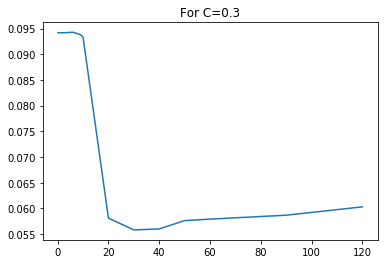

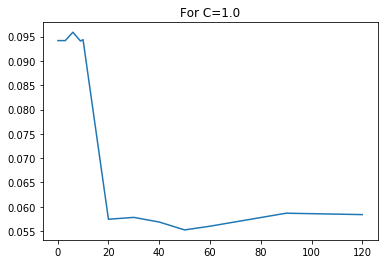

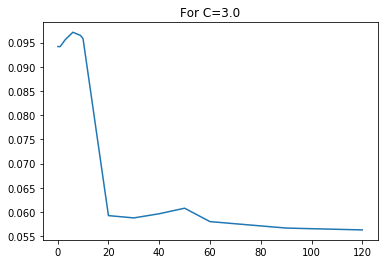

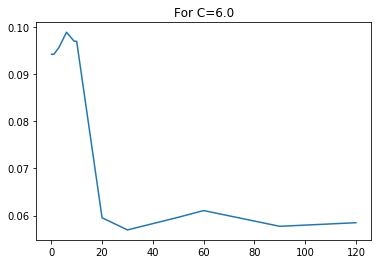

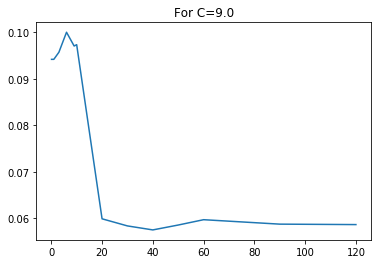

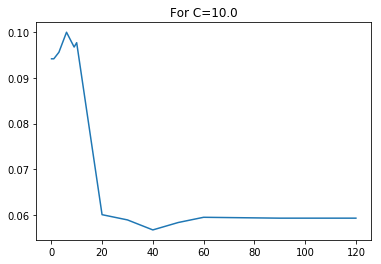

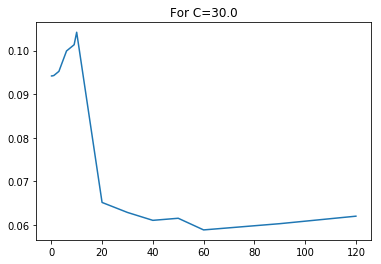

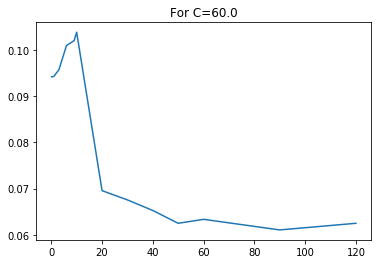

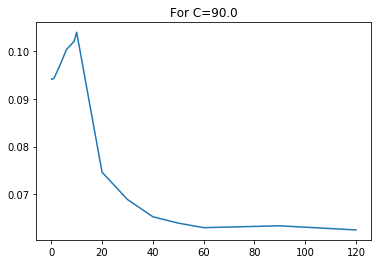

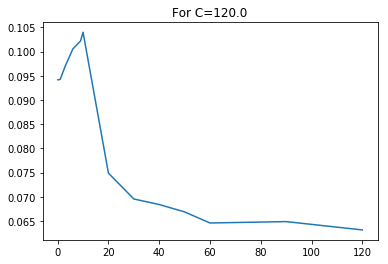

In [7]:
p_e=np.loadtxt("/home/kushal/Desktop/Simulation/POC/neuralnet/svm/pe.dat")
(c_num,s_num)=(np.shape(p_e))

for i in range(c_num):
    plt.plot(ss,p_e[i,:])
    plt.title('For C='+str(cs[i]))
    plt.show()

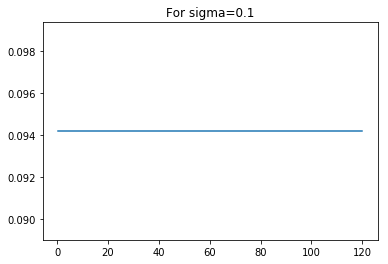

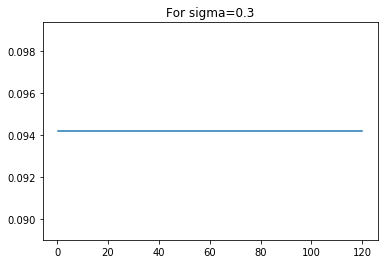

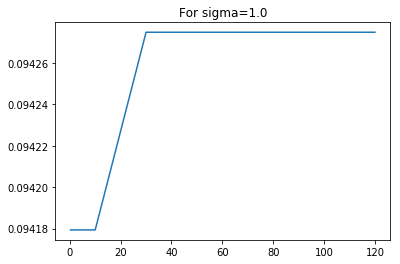

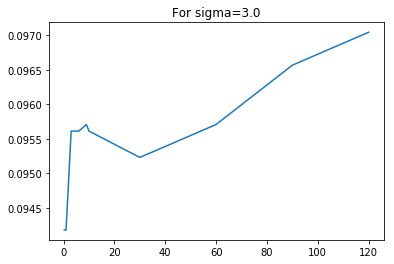

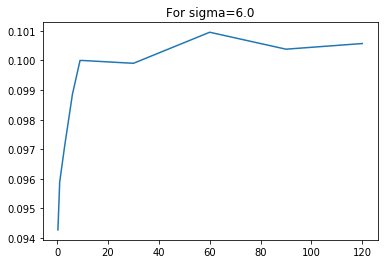

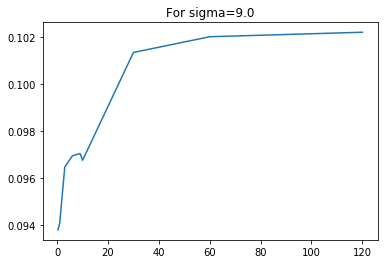

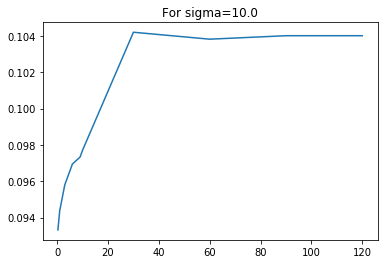

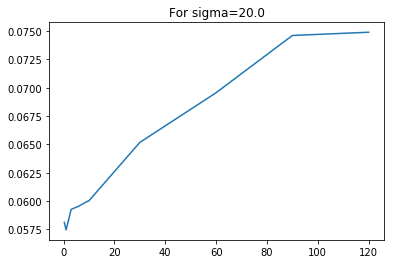

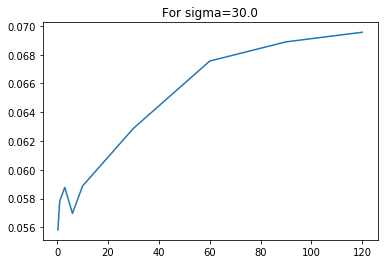

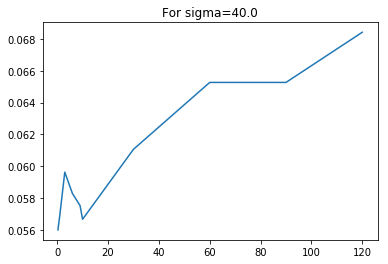

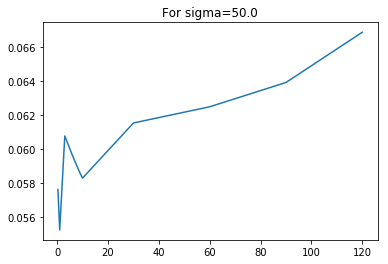

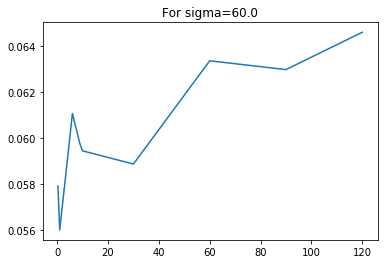

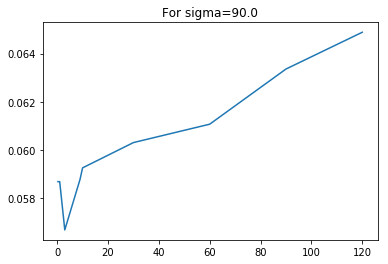

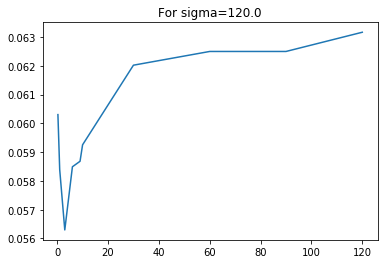

In [8]:
for i in range(s_num):
    plt.plot(cs,p_e[:,i])
    plt.title('For sigma='+str(ss[i]))
    plt.show()

In [9]:
for i in range(100):
    dwt_file=dwt_list[i]
    ann_file=annotation_list[i]
    dwt_in=np.loadtxt(file_path+dwt_file)
    ann_in=np.loadtxt(file_path+ann_file)
    [temp_in,temp_out]=data_creation(dwt_in[0],ann_in,window_size=15)
    if i==0:
       data_in=temp_in
       data_out1=temp_out
    else:    
       data_in=np.vstack((data_in,temp_in))
       data_out1=np.vstack((data_out1,temp_out))
   
x1=data_in
y=np.squeeze(np.asarray(data_out1))



clf=svm.SVC(C=c,kernel='rbf',gamma=(1/s),tol=1e-8)
clf.fit(x1,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-08, verbose=False)

In [10]:
def error(ref,prediction):
    ref=np.array(ref)
    prediction=np.array(prediction)
    err=np.linalg.norm(prediction-ref,2)
    return err

def confusion_matrix(ref,prediction):
    ref=np.array(ref)
    prediction=np.array(prediction)
    err=ref-prediction
    err.astype(int)
    false_alarms=np.sum(err==-1)/512
    miss=np.sum(err==1)/512
    return [false_alarms,miss]

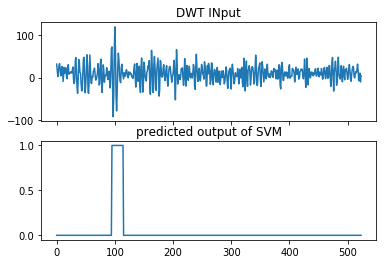

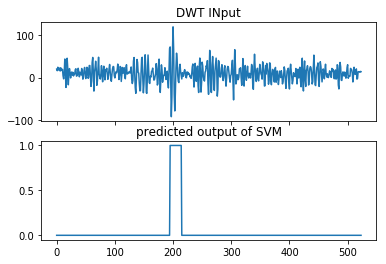

Avg RMS error per ascan:
3.804091397676492
Variance of RMS error per ascan:
1.2821088345189684
False Alarm:
0.013356700794621026
Miss:
0.018117741442542787


In [12]:
j=0
ind_rms_ascan_err=[]
ind_fa_ascan_err=[]
ind_miss_ascan_err=[]

for i in range(101,len(dwt_list)):
    test_inf=dwt_list[i]
    test_outf=annotation_list[i]
    test_in=np.loadtxt(file_path+test_inf)
    test_out=np.loadtxt(file_path+test_outf)
    [stest_in,stest_out]=data_creation(test_in[0],test_out,window_size=15)
    stest_in=stest_in.tolist()
    pred=clf.predict(stest_in)
    pred=np.squeeze(np.asarray(pred))
    stest_out=np.squeeze(np.asarray(stest_out))
    ind_rms_ascan_err.append(error(stest_out,pred))
    [tfa,tm]=confusion_matrix(stest_out,pred)
    ind_fa_ascan_err.append(tfa)
    ind_miss_ascan_err.append(tm)
    x=np.arange(np.size(pred))
    if j<2 and i>=106 and i<108:
        f,axarr=plt.subplots(2,sharex=True)
        axarr[0].plot(x,test_in[0])
        axarr[0].set_title('DWT INput')
        #axarr[1].plot(x,stest_out)
        #axarr[1].set_title('Expected output')
        axarr[1].plot(x,pred)
        axarr[1].set_title('predicted output of SVM')
        plt.show()
        j=j+1
        
print("Avg RMS error per ascan:")
print(np.mean(np.array(ind_rms_ascan_err)))
print("Variance of RMS error per ascan:")
print(np.std(np.array(ind_rms_ascan_err)))

print("False Alarm:")
print(np.mean(np.array(ind_fa_ascan_err)))
print("Miss:")
print(np.mean(np.array(ind_miss_ascan_err)))